<a href="https://colab.research.google.com/github/kylie17kelly/Machine-Learning-Projects/blob/main/Credit_Card_Default_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Explanation**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content**
There are 25 variables:

ID: ID of each client

LIMIT_BAL: 
Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import statsmodels.api as sm

sns.set()
rand_state=1000

#imported libraries to use

In [ ]:
from google.colab import files
uploaded = files.upload()
#uploaded .csv file

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


In [ ]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [ ]:
df_raw = df
df.head()

#we want the raw form of the data
#want first 5 rows of data to be reutrned (df.head)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.shape
#this command shows that there are 3000 rows and 25 columns

(30000, 25)

In [ ]:
df.columns
#using command to display the columns the dataset has

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Looking at the columns we can see that Pay_0 should be Pay_1 to follow the numerical structure of BILL_AMT and PAY_AMT

In [ ]:
# We can fix the typo simply by renaming it.
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [ ]:
df.info()
#displaying information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**Cleaning and Organizing**

In [ ]:
df.nunique()
#displaying all unique features
#based on this output we can classify features as cateorical or numeric

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [ ]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
##Identifying categorical variables and constructing them. 
#The categorical variables are the following because they all are 
#countable numbers of distinct groups based on their characteristic.
from pandas.core.arrays import categorical
categorical = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']

for col in categorical:
  df[col] = df[col].astype("category")

df[categorical].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10,2
top,2,2,2,0,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


Looking at the table, we can see some inconsistencies in the data. For example the minimum for marriage is 0 instead of 1, and the minimum for education is 0 instead of 1.

In [ ]:
# Fixing marriage
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x == 0 else x)

# Fixing education and grouping unkown education of column 5 and 6, to combine with "other" column 4
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df[categorical].describe()

,EDUCATION,MARRIAGE
count,30000.000000,30000.000000
mean,1.842267,1.557267
std,0.744494,0.521405
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,4.000000,3.000000


In [ ]:
#classifying all other features as numeric
numeric = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                      'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                      'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in numeric:
    df[col]=pd.to_numeric(df[col], errors='coerce')
#prefaced pd.to_numeric because we cannot convert non-finite values such as NA or inf. Coercing errors to NAs

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0


Because the value for "count" is 3000 across all features, there are no missing values

In [ ]:
#No duplicated data
sum(df.duplicated())

0

**Analsysis of Default Payment**

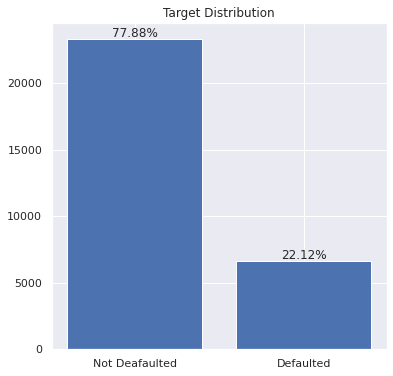

In [ ]:
#defining target_count as defaulted payments the next month
##plotting figure to display percentage defaulted payments the next month
###defining what the total amount of default payments are, the non-default payments, and the yes-default payments
###outputting graph to display percent of default payments

target_count = df.groupby('default.payment.next.month').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default.payment.next.month'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(df['default.payment.next.month'])
not_def = len(df[df['default.payment.next.month']==0])/total *100
yes_def = len(df[df['default.payment.next.month']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(df[df['default.payment.next.month']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(df[df['default.payment.next.month']==1])*1.02), horizontalalignment='center')

plt.show()

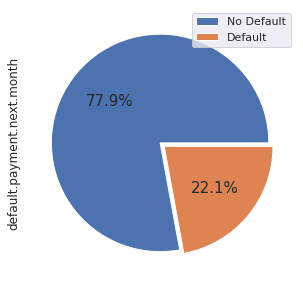

In [ ]:
#plotting a pi-chart to see percets another way
plt.figure(figsize=(7,5))

df['default.payment.next.month'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()


> The bar graph and the pi-chart show that approximately 78% of clients in Taiwan during 2005 did not default on their next payment; however approximately 22% of clients did default on their next payment.



 



**Analysis of Age**

AGE        
(21, 25]  1    26.761304
(25, 35]  1    19.825321
(35, 45]  1    21.837597
(45, 55]  1    24.941176
(55, 65]  1    26.517150
(65, 79]  1    26.744186
Name: default.payment.next.month, dtype: float64


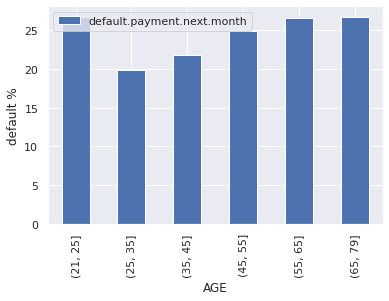

In [ ]:
df_copy = df
age_bins = [df['AGE'].min(), 25, 35, 45, 55, 65, df['AGE'].max()]
df_copy['AGE'] = pd.cut(df['AGE'], age_bins)
val_counts = df_copy.groupby('AGE')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');



> Looking at the bar graph above, it displays the percent of default payment next month based on age, for data collected in Taiwan in 2005. The graph shows that individuals between 25 to 35 years old seem to be the only group less likely to default on their next payment. From the numbers outputted above the graph, it also seems that indiviudals between 21 to 25 are the most likely to deault on their next payment. 



**Analysis of Sex**

In [ ]:
df['SEX']= df['SEX'].map({1:'male', 2:'female'})
#setting 1=male and 2=female

In [ ]:
df['SEX'].value_counts()
#outputting value counts for each sex

female    18112
male      11888
Name: SEX, dtype: int64

female    60.373333
male      39.626667
Name: SEX, dtype: float64


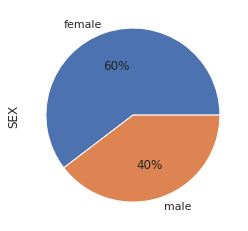

In [ ]:
#outputting a pi chart to reflect the percentage of how much of the data is male or female
print(pd.value_counts(df['SEX']) / len(df) * 100)
pd.value_counts(df['SEX']).plot(kind='pie', y='SEX', autopct='%1.0f%%');



> From the graph above we can see that females take up the majority of our data--about 60%.


In [ ]:
df['default.payment.next.month'].groupby(df['SEX']).value_counts(normalize = True)
#outputting liklihood of default of payment next month grouped by each sex

SEX      
male    0    0.758328
        1    0.241672
female  0    0.792237
        1    0.207763
Name: default.payment.next.month, dtype: float64

SEX      
male    1    24.167227
female  1    20.776281
Name: default.payment.next.month, dtype: float64


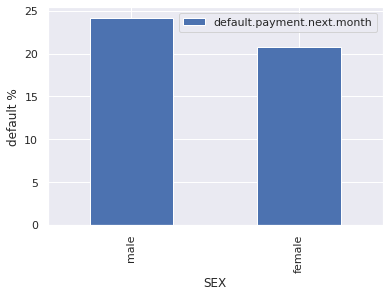

In [ ]:
#outputting value counts for liklihood of default payment next month grouped by each sex
##printing out bar plot to compare males and females
val_counts = df.groupby('SEX')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');


> Looking at the bar graph above, displaying percent of default payments the next month grouped by sex, we can see that males have a slighter higher probabilty of defaulting on their next payment (about 4% more of a chance than females--looking at the outputted values above the graph). 



**Analysis of Education**

University    46.766667
Graduate      35.283333
Highschool    16.390000
Other          1.560000
Name: EDUCATION, dtype: float64


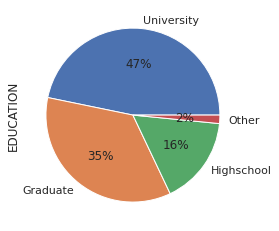

In [ ]:
#defining education as Graduate, University, Highschool, and Other
##Printing value counts and multiplying by 100 for percents
###printing pi-chart to look at data 
df['EDUCATION']= df['EDUCATION'].map({1:'Graduate', 2:'University', 3:'Highschool', 4:'Other'})
print(pd.value_counts(df['EDUCATION']) / len(df) * 100)
pd.value_counts(df['EDUCATION']).plot(kind='pie', y='EDUCATION', autopct='%1.0f%%');



> Looking at the pi-chart, we can see that most of the individuals in our data completed University, with most individuals also completing Graduate school.



EDUCATION    
Graduate    1    19.234766
Highschool  1    25.157616
Other       1     7.051282
University  1    23.734854
Name: default.payment.next.month, dtype: float64


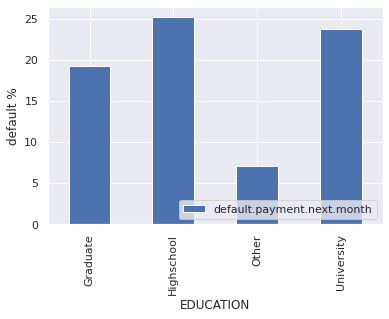

In [ ]:
#Printing values for default payments next month, grouped by education level
##printing bar graph and percent values
val_counts = df.groupby('EDUCATION')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.legend(loc='lower right');



> Looking at the bar graph and outputted values, we can see that a higher education level translates to a lower chance of default. The individuals completing Graduate school seem to have the less likely chance of defaulting on their payment the next month, while individuals only completing high school, have the highest chance of deafaulting on their next payment. The other/unknown category can be assumed to have individuals with education lower than high school, also has a low chance of defaulting on their next payment. This could be due to the fact that individuals with education lower than highschool, most likely don't have credit cards, or any large amounts of credit card paymount amounts. 



**Analysis of Marriage**

Single     53.213333
Married    45.530000
Other       1.256667
Name: MARRIAGE, dtype: float64


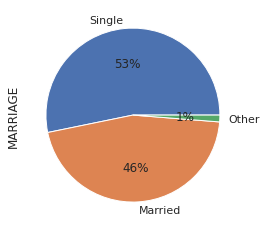

In [ ]:
#defining marraige as married, single, or other
##printing valyes of marraige and multiplying by 100 to get percents
##outputting pi-chart of data grouped by marriage
df['MARRIAGE']= df['MARRIAGE'].map({1:'Married', 2:'Single', 3:'Other'})
print(pd.value_counts(df['MARRIAGE']) / len(df) * 100)
pd.value_counts(df['MARRIAGE']).plot(kind='pie', y='MARRIAGE', autopct='%1.0f%%');



> The pi-chart above shows that most of individuals in our data fall into either the 'Married' or 'Single' category. 



MARRIAGE   
Married   1    23.471704
Other     1    23.607427
Single    1    20.928339
Name: default.payment.next.month, dtype: float64


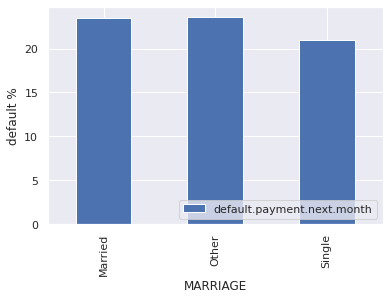

In [ ]:
#outputting values for default payment next month, grouped my marital status
##printing out values for each index
##outputting bar graph of % defaults for marital status
val_counts = df.groupby('MARRIAGE')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.legend(loc='lower right');



> Looking at the bar graph and outputted values above, we can see that both married and single individuals have around a 20%-23% chance of defaulting on their payment next month. Single individuals are a little less likely to default on their payment next month, compared to married individuals and individuals with other marital status. (The other marital status could include divorced individuals).



**Analysis of Amount of given credit (Limit Bal)**

LIMIT_BAL               
(10000.0, 120000.0]    1    28.515654
(120000.0, 230000.0]   1    18.148671
(230000.0, 340000.0]   1    15.080527
(340000.0, 450000.0]   1    14.467543
(450000.0, 560000.0]   1    11.521152
(560000.0, 670000.0]   1     8.333333
(670000.0, 780000.0]   1    12.121212
(780000.0, 890000.0]   1     0.000000
(890000.0, 1000000.0]  1     0.000000
Name: default.payment.next.month, dtype: float64
(10000.0, 120000.0]      44.396667
(120000.0, 230000.0]     28.340000
(230000.0, 340000.0]     13.660000
(340000.0, 450000.0]      7.856667
(450000.0, 560000.0]      3.703333
(560000.0, 670000.0]      0.280000
(670000.0, 780000.0]      0.110000
(780000.0, 890000.0]      0.006667
(890000.0, 1000000.0]     0.003333
Name: LIMIT_BAL, dtype: float64


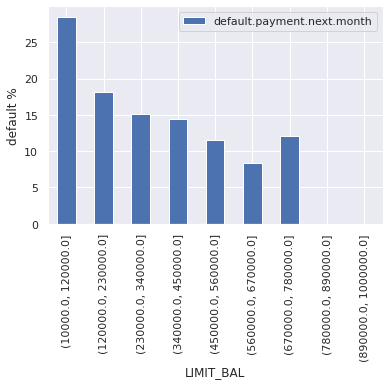

In [ ]:
#creating a copy of the data frame
##creating limit balance bins
#outputting values of default payment next month, grouped by the limit balance bins
#outputting bar graph
df_copy = df.copy()
limit_bal_bins = np.linspace(df['LIMIT_BAL'].min(), df['LIMIT_BAL'].max(), 10)
df_copy['LIMIT_BAL'] = pd.cut(df['LIMIT_BAL'], limit_bal_bins)
val_counts = df_copy.groupby('LIMIT_BAL')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');

print(pd.value_counts(df_copy['LIMIT_BAL']) / len(df) * 100)



> Looking at the graph above, we can see that individuals with a higher amount of credit given, are less likely to default on their next payment. This could be due to the fact that they previousy pay their credit card payments on time and were given more credit. More credit could also assume that individuals are more responsible, thus they are less likely to default on their card payments next month.



**Amount of Credit Given Based on Sex**

In [ ]:
#grouping sex and limit balance togethr
df.groupby('SEX')['LIMIT_BAL'].mean()

SEX
male      163519.825034
female    170086.462014
Name: LIMIT_BAL, dtype: float64

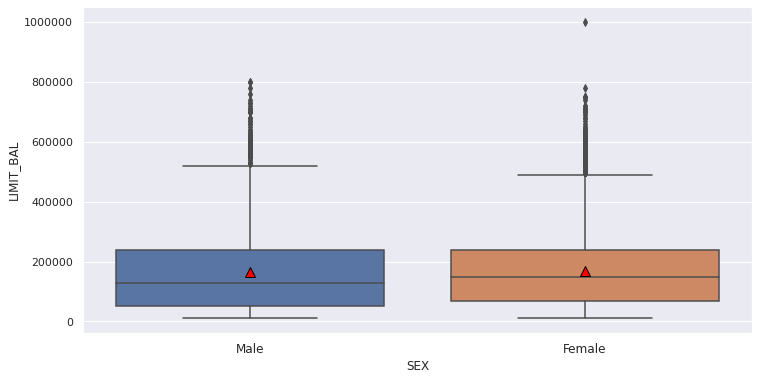

In [ ]:
#plotting figure to show a box plot of limit balance and sex
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = df, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()



> The box plot above depicts that males and females have around the same credit limits. 



**Amount of Credit Given Based on Education**

In [ ]:
#grouping education and limit balance together
df.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
Graduate      212956.069910
Highschool    126550.270490
Other         181316.239316
University    147062.437634
Name: LIMIT_BAL, dtype: float64

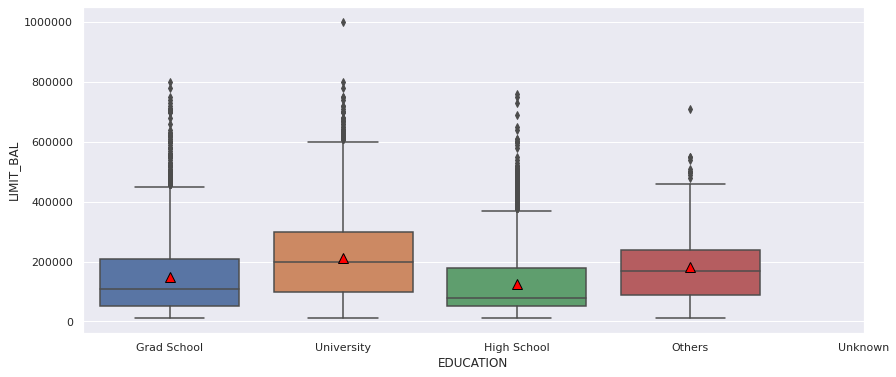

In [ ]:
#plotting box plot figure based on education status 
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()



> Looking at the box plots above, Univeristy individuals recieve the highest credit lmit, where individuals with a High School level education recieve the lowest credit limit. This could be in part that University students tend to be older than high school students and can assume more responsibility. However, there may be unaccounted factors that attribute to University individuals having a higher credit limit.



**Amount of Credit Given Based on Marital Status**

In [ ]:
#grouped marriage by limit balance
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

MARRIAGE
Married    182200.893184
Other      103076.923077
Single     156413.660737
Name: LIMIT_BAL, dtype: float64

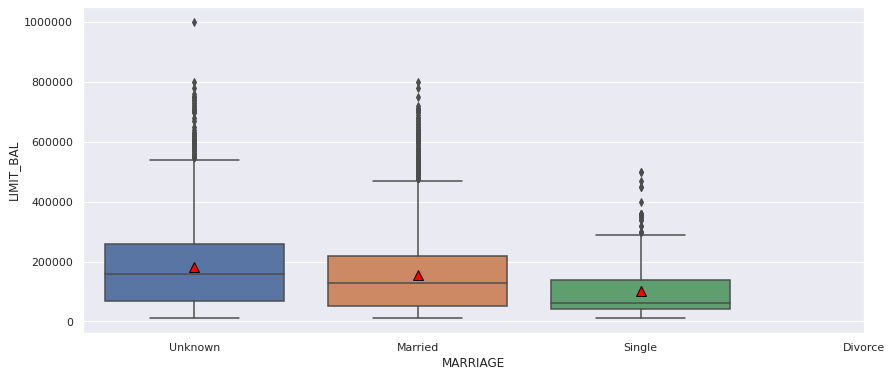

In [ ]:
#plot box plot of marriage and limit balance
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()




> Looking at the graph above, we can see that single individuals tend to have the lowest credit limit, while married and unknown marital status individuals have higher credit limits. 



**Analysis of Repayment Status (Pay_X)**

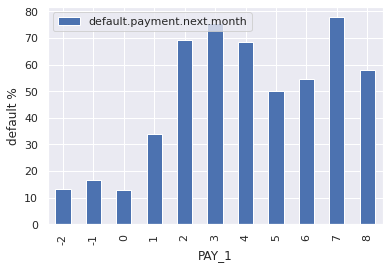

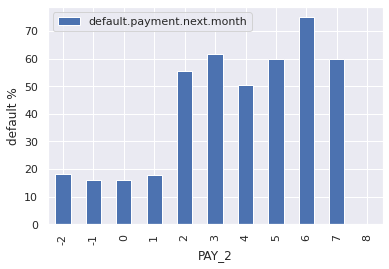

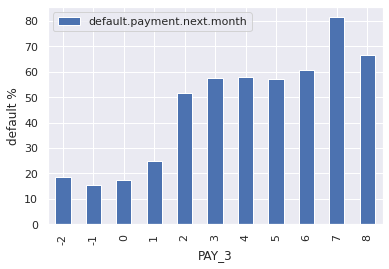

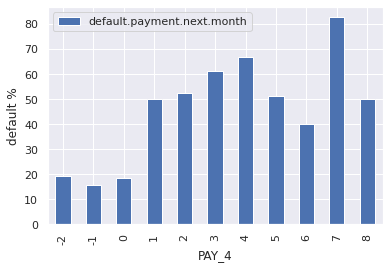

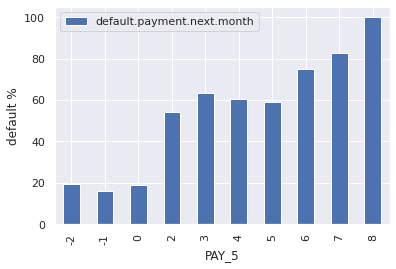

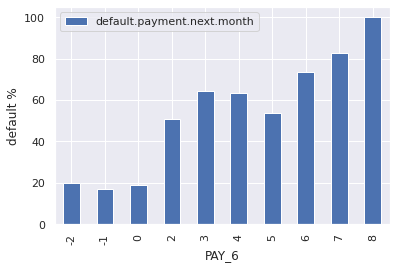

In [ ]:
#for all the repayment amounts, they are grouped by default payment next month, and set to have value counts as percentages to be displayed on bar graphs

val_counts = df.groupby('PAY_1')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
val_counts = df.groupby('PAY_2')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
val_counts = df.groupby('PAY_3')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
val_counts = df.groupby('PAY_4')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
val_counts = df.groupby('PAY_5')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
val_counts = df.groupby('PAY_6')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');



> Each graph displays a different month of repayment status for the individuals in the data set. Looking at all the months, we can see a pattern that if individuals start to delay their payments (x is greater than or equal to 2), their chance of defaulting on their next payment increases. Individuals with negative values are individuals that pay duly or pay extra in a given month. This good paying behavior is seen as they are the least likely groups to default on their next payment



**Analysis of Amount of Bill (Bill_Amtx)**

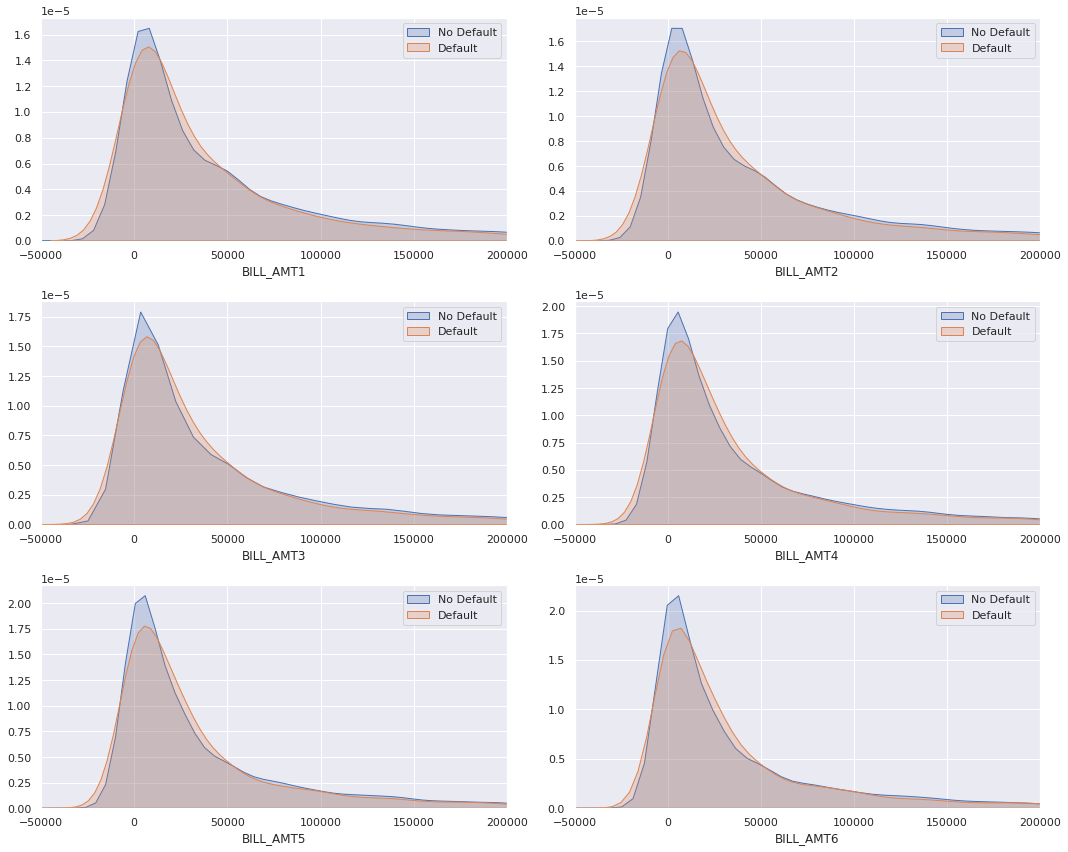

In [ ]:
#creating amount of bill column
#creating for loop to display graph that shows default and non default individuals based on their bill amout
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['default.payment.next.month'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['default.payment.next.month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()




> The graphs above show the liklihood of individuals defaulting on their next payment, grouped by their bill amount. Each graph represents a different month in 2005. Looking at the overall trends of the data, most individuals have bill amounts between $0 and 50,0000. Around this area, we can also see that individuals are more likly to default with the higher their bill amount is. 



**Analysis of Previous Payment (Pay_AMTX)**

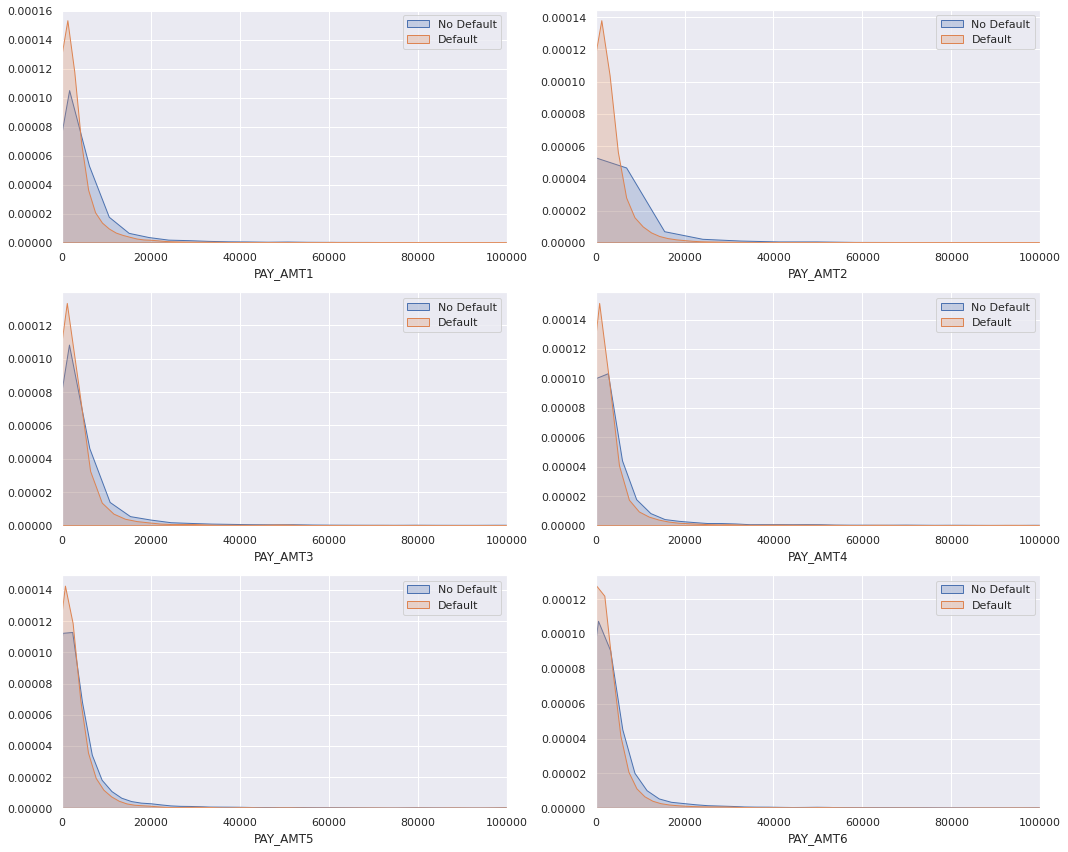

In [ ]:
#creating column of all the pay amounts
##creating graphs of default payment next month based on their previous payment
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['default.payment.next.month'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(df.loc[(df['default.payment.next.month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()



> These graphs show the previous payment amouts and the individuals likelihood of default. Each graph is representative of a different month in 2005. Looking at the graphs we can see there is a higher default rate among those who paid nothing in previous months an dlower rates among those that paid over $20,000. 

